# Representing Data as a Graph

In this file, I will be demonstrating how to represent a molecule as a graph from SDF files.

In [11]:
#Imports
import os
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
"""
A function for reading sdf files
"""

from typing import Optional, Tuple, List


def parse_sdf(
    filename: str, include_hydrogen: Optional[bool] = False
) -> Tuple[List, List]:
    """
    Read an sdf file and return the atom and bond info

    Parameters
    ----------
    filename : str
        The name of the file to analyze
    include_hydrogen : Optional[bool]
        Controls whether information about hydrogens is returned.

    Returns
    -------
    elements : list
        A list of elements
    bonds: list
        A list of tuples where the first two numbers represent the atom indices
        and the third represents the bond order.
    """

    with open(filename) as f:
        data = [x.strip() for x in f.readlines()]

    num_atoms = int(data[3].split()[0])
    num_bonds = int(data[3].split()[1])

    atom_end = 4 + num_atoms
    bond_end = 4 + num_atoms + num_bonds

    atoms = data[4:atom_end]
    bonds = data[atom_end:bond_end]

    elements = [x.split()[3] for x in atoms]

    bond_pairs = [
        (int(x.split()[0]), int(x.split()[1]), int(x.split()[2])) for x in bonds
    ]

    if include_hydrogen is not True:
        bond_pairs = [
            x
            for x in bond_pairs
            if elements[x[0] - 1] != "H" and elements[x[1] - 1] != "H"
        ]
        elements = [x for x in elements if x != "H"]

    # Fix so that bond indices use python indexing
    bond_pairs = [(x[0] - 1, x[1] - 1, x[2]) for x in bond_pairs]

    return elements, bond_pairs

In [ ]:
"""
Functions to create a graph representation of our molecule and save it
"""

#Dictionary for CPK Coloring
COLOR = {
        "H" : "white",
        "O" : "red",
        "N" : "blue",
        "C": "gray"
    }

def create_graph(nodes: list[tuple], edges: list[tuple]) -> nx.Graph:
    """
    Creating a graph from our atoms and bond pairs extracted from our element file

    Parameters
    ----------
    nodes : list[tuple]
        Our atoms extracted from an element file
    edges : list[tuple]
        The bond pairs in our element
    Returns
        Our element represented as a graph of nodes and edges
    -------
    """
    #Create an instance of our networkx graph
    g = nx.Graph()
    
    #Extract our atom positions from our edges list
    positions = [e[0:2] for e in edges]
    g.add_edges_from(positions)

    #Create a dictionary of our atoms to label our graph with
    labels = {}
    for i in range(len(g.nodes)):
        labels[i] = nodes[i]

    #Set each atom to its corresponding color
    for i in range(len(g.nodes)):
        atom_color = COLOR.get(labels[i])
        g.add_node(i, color=atom_color)
    colors = nx.get_node_attributes(g, "color")

    #Create our graph
    pos = nx.spring_layout(g)
    nx.draw_networkx(g, pos, with_labels=False, node_color=[colors[n] for n in g.nodes()], edgecolors="black", node_size=500, edge_color="black")
    nx.draw_networkx_labels(g, pos, labels=labels)

    return g


'def visualize_molecule(graph: nx.Graph):\n    """\n    Creating the image of our graph\n\n    Parameters\n    ----------\n    graph: nx.Graph\n        Our graph created from create_graph()\n    Returns\n        Our graph represented in a figure\n    -------\n    """\n    #Save our figure based on the molecule file we are passing through\n    plt.savefig(f"{DATA}_graph.png")\n'

In [14]:
def count_rings(graph: nx.Graph) -> tuple[int, list[int]]:
    """
    Counting the number of rings

    Parameters
    ----------
    graph: nx.Graph
        Our graph created from create_graph()
    Returns
        The number of rings found in our molecule
    -------
    """

    #Rings are represented as cycles in our graph
    cycles = list(nx.cycle_basis(graph))
    atoms = graph.number_of_nodes()

    return len(cycles), atoms


aspirin has 1 rings and 13 atoms


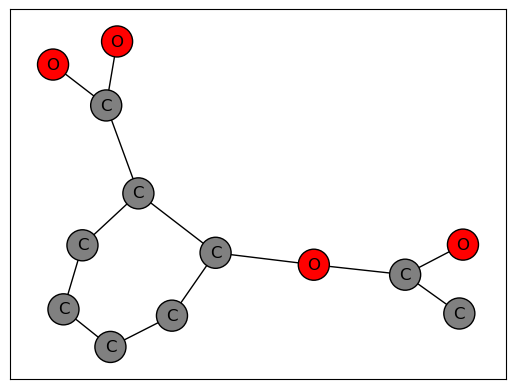

In [19]:
#Testing with our Aspirin molecule
aspirin = os.path.join("data", "aspirin.sdf")

nodes,edges = parse_sdf(aspirin)
graph = create_graph(nodes, edges)
rings, atoms = count_rings(graph)

print(f"aspirin has {rings} rings and {atoms} atoms")

butane has 0 rings and 4 atoms


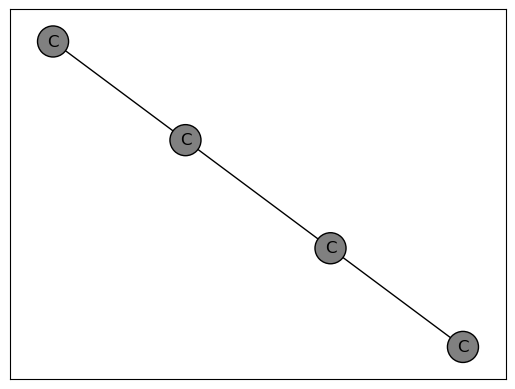

In [20]:
#Testing with our Butane molecule
butane = os.path.join("data", "butane.sdf")

nodes,edges = parse_sdf(butane)
graph = create_graph(nodes, edges)
rings, atoms = count_rings(graph)

print(f"butane has {rings} rings and {atoms} atoms")

bisphenol_a has 2 rings and 17 atoms


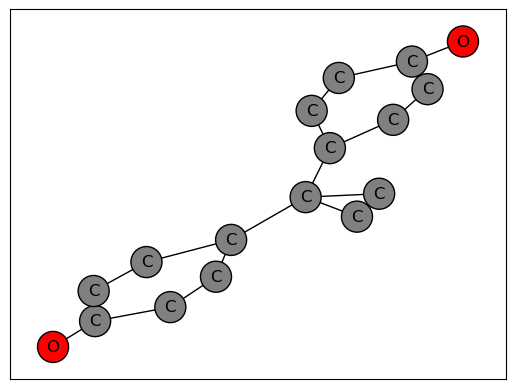

In [21]:
#Testing with our BPA molecule
bisphenol_a = os.path.join("data", "bisphenol_a.sdf")

nodes,edges = parse_sdf(bisphenol_a)
graph = create_graph(nodes, edges)
rings, atoms = count_rings(graph)

print(f"bisphenol_a has {rings} rings and {atoms} atoms")

cholesterol has 4 rings and 28 atoms


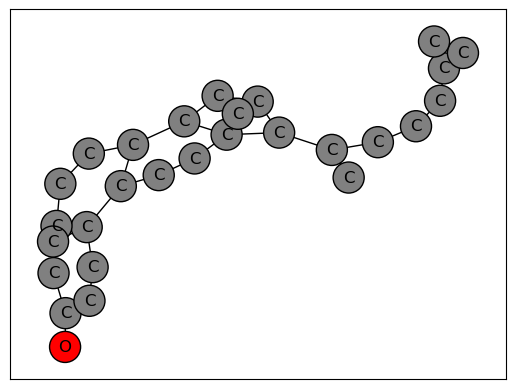

In [22]:
#Testing with our Cholesterol molecule
cholesterol = os.path.join("data", "cholesterol.sdf")

nodes,edges = parse_sdf(cholesterol)
graph = create_graph(nodes, edges)
rings, atoms = count_rings(graph)

print(f"cholesterol has {rings} rings and {atoms} atoms")

histidine has 1 rings and 11 atoms


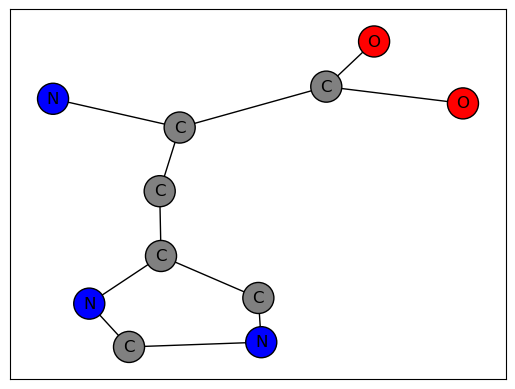

In [23]:
#Testing with our Histidine molecule
histidine = os.path.join("data", "histidine.sdf")

nodes,edges = parse_sdf(histidine)
graph = create_graph(nodes, edges)
rings, atoms = count_rings(graph)

print(f"histidine has {rings} rings and {atoms} atoms")